# geometry_conversion.ipynb

Supplements the work in `craigslist_regression.ipynb`. 

This notebook uses `geopandas` to calculate the neighborhood for each apartment listing (uses geometry from the `.geojson` of NYC neighborhoods).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from shapely.geometry import Point, Polygon
import geopandas

In [3]:
neighborhood_df = pd.read_pickle("./pickles/neighborhood_df.pkl")
neighborhood_df.head()

,post_id,lat,lon
1,7061095044,40.711900,-73.794400
2,7061094612,40.711900,-73.794400
3,7061094200,40.711900,-73.794400
4,7061093913,40.702900,-73.811100
5,7061093626,40.743201,-73.920591


In [4]:
_pnts = [Point(neighborhood_df.lon[i],neighborhood_df.lat[i]) for i in neighborhood_df.index]
pnts = geopandas.GeoDataFrame(geometry=_pnts, index=neighborhood_df.post_id)
pnts.head()

,geometry
post_id,
7061095044,POINT (-73.79440 40.71190)
7061094612,POINT (-73.79440 40.71190)
7061094200,POINT (-73.79440 40.71190)
7061093913,POINT (-73.81110 40.70290)
7061093626,POINT (-73.92059 40.74320)


In [5]:
neighborhood_names = geopandas.read_file("./data/Neighborhood Tabulation Areas (NTA).geojson")
neighborhood_names.head()

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,BK88,54005019.048,047,Borough Park,39247.2278309,Brooklyn,3,"MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ..."
1,QN51,52488277.846,081,Murray Hill,33266.9047967,Queens,4,"MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ..."
2,QN27,19726845.6282,081,East Elmhurst,19816.7120736,Queens,4,"MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ..."
3,QN07,22887772.8652,081,Hollis,20976.3355739,Queens,4,"MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ..."
4,MN06,10647077.5264,061,Manhattanville,17040.6854129,Manhattan,1,"MULTIPOLYGON (((-73.94608 40.82126, -73.94640 ..."


In [6]:
polys = neighborhood_names[['ntaname','geometry']].set_index('ntaname')
polys.head()

,geometry
ntaname,
Borough Park,"MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ..."
Murray Hill,"MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ..."
East Elmhurst,"MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ..."
Hollis,"MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ..."
Manhattanville,"MULTIPOLYGON (((-73.94608 40.82126, -73.94640 ..."


In [7]:
pnts['borough'] = ""
pnts.head()

,geometry,borough
post_id,,
7061095044,POINT (-73.79440 40.71190),
7061094612,POINT (-73.79440 40.71190),
7061094200,POINT (-73.79440 40.71190),
7061093913,POINT (-73.81110 40.70290),
7061093626,POINT (-73.92059 40.74320),


In [8]:
p0 = pnts.iloc[0,0]
g0 = polys.iloc[0,0]
p0,g0

(<shapely.geometry.point.Point at 0x11d166ac8>,
 <shapely.geometry.multipolygon.MultiPolygon at 0x11d1cafd0>)

In [9]:
def find_borough(point):
    for b, row in polys.iterrows():
        g = row.geometry
        if point.within(g):
            return b
    return None

In [10]:
for ind, row in pnts.iterrows():
    p = row.geometry
    b = find_borough(p)
    pnts.loc[ind,'borough'] = b

pnts.head()

,geometry,borough
post_id,,
7061095044,POINT (-73.79440 40.71190),Briarwood-Jamaica Hills
7061094612,POINT (-73.79440 40.71190),Briarwood-Jamaica Hills
7061094200,POINT (-73.79440 40.71190),Briarwood-Jamaica Hills
7061093913,POINT (-73.81110 40.70290),Jamaica
7061093626,POINT (-73.92059 40.74320),Hunters Point-Sunnyside-West Maspeth


In [11]:
pnts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1890 entries, 7061095044 to 7044113902
Data columns (total 2 columns):
geometry    1890 non-null geometry
borough     1662 non-null object
dtypes: geometry(1), object(1)
memory usage: 124.3+ KB


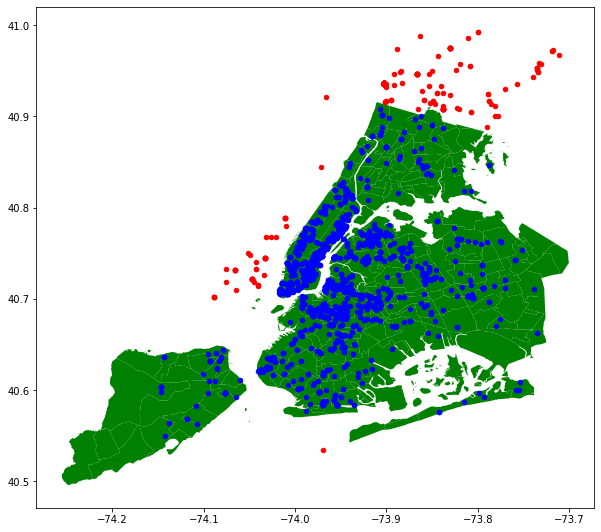

In [12]:
f, ax = plt.subplots(figsize=(10,10))
polys.plot(ax=ax, color='green')
pnts[pnts.borough.notna()].plot(ax=ax, marker='o', color='blue', markersize=20)
pnts[pnts.borough.isnull()].plot(ax=ax, marker='o', color='red', markersize=20)

In [13]:
pnts.borough = pnts.borough.fillna("Other")

# OOOPS! Those aren't boroughs those are neighborhoods
pnts.rename(columns={'borough':'neighborhood'},inplace=True)

***

In [14]:
neighborhood_df.head()

,post_id,lat,lon
1,7061095044,40.711900,-73.794400
2,7061094612,40.711900,-73.794400
3,7061094200,40.711900,-73.794400
4,7061093913,40.702900,-73.811100
5,7061093626,40.743201,-73.920591


In [15]:
neighborhood_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 1 to 9706
Data columns (total 3 columns):
post_id    1890 non-null object
lat        1890 non-null float64
lon        1890 non-null float64
dtypes: float64(2), object(1)
memory usage: 139.1+ KB


In [16]:
pnts.head()

,geometry,neighborhood
post_id,,
7061095044,POINT (-73.79440 40.71190),Briarwood-Jamaica Hills
7061094612,POINT (-73.79440 40.71190),Briarwood-Jamaica Hills
7061094200,POINT (-73.79440 40.71190),Briarwood-Jamaica Hills
7061093913,POINT (-73.81110 40.70290),Jamaica
7061093626,POINT (-73.92059 40.74320),Hunters Point-Sunnyside-West Maspeth


In [17]:
boroughs = pd.DataFrame(pnts).drop(columns='geometry')
boroughs.head()

,neighborhood
post_id,
7061095044,Briarwood-Jamaica Hills
7061094612,Briarwood-Jamaica Hills
7061094200,Briarwood-Jamaica Hills
7061093913,Jamaica
7061093626,Hunters Point-Sunnyside-West Maspeth


In [18]:
boroughs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1890 entries, 7061095044 to 7044113902
Data columns (total 1 columns):
neighborhood    1890 non-null object
dtypes: object(1)
memory usage: 29.5+ KB


In [19]:
neighborhood_df = neighborhood_df.set_index('post_id').join(boroughs).reset_index()
neighborhood_df.head()

,post_id,lat,lon,neighborhood
0,7043852389,40.706367,-74.015660,Battery Park City-Lower Manhattan
1,7043879172,40.751654,-73.999723,Hudson Yards-Chelsea-Flatiron-Union Square
2,7043882068,40.726958,-74.003445,SoHo-TriBeCa-Civic Center-Little Italy
3,7043897638,40.757100,-73.965700,Turtle Bay-East Midtown
4,7043924975,40.681221,-73.980463,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill


In [20]:
borough_neighborhood = pd.DataFrame(neighborhood_names[['ntaname','boro_name']]).reset_index(drop=True)
borough_neighborhood.head()

,ntaname,boro_name
0,Borough Park,Brooklyn
1,Murray Hill,Queens
2,East Elmhurst,Queens
3,Hollis,Queens
4,Manhattanville,Manhattan


In [21]:
borough_dict = borough_neighborhood.set_index('ntaname').to_dict()['boro_name']

In [22]:
neighborhood_df['borough'] = neighborhood_df['neighborhood'].apply(lambda n: borough_dict[n] if n in borough_dict else "Other")
neighborhood_df.head()

,post_id,lat,lon,neighborhood,borough
0,7043852389,40.706367,-74.015660,Battery Park City-Lower Manhattan,Manhattan
1,7043879172,40.751654,-73.999723,Hudson Yards-Chelsea-Flatiron-Union Square,Manhattan
2,7043882068,40.726958,-74.003445,SoHo-TriBeCa-Civic Center-Little Italy,Manhattan
3,7043897638,40.757100,-73.965700,Turtle Bay-East Midtown,Manhattan
4,7043924975,40.681221,-73.980463,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,Brooklyn


In [23]:
neighborhood_df.borough.value_counts()

Manhattan        568
Brooklyn         545
Queens           424
Other            228
Bronx             73
Staten Island     56
Name: borough, dtype: int64

Save out the final `DataFrame` to be picked back up in `craigslist_regression.ipynb`.

In [24]:
neighborhood_df.to_pickle("./pickles/neighborhood_df.pkl")